<a href="https://www.kaggle.com/code/satyaraghav/eda-on-datascience-salaries-db?scriptVersionId=135320346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


# importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading a csv file

In [3]:
inp0 = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')

In [4]:
inp0.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Analyzing shape of data

In [5]:
inp0.shape

(3755, 11)

In [6]:
inp0.describe

<bound method NDFrame.describe of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency

In [7]:
inp0.size

41305

In [8]:
len(inp0)

3755

In [9]:
inp0.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# data cleaning checking for nulls

In [10]:
inp0.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [11]:
inp0.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Studying all categorical data first

In [12]:
inp0['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [13]:
inp0['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [14]:
inp0['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [15]:
inp0['salary_currency'].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [16]:
inp0['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [17]:
inp0['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [18]:
inp0['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [19]:
inp0.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [20]:
inp0['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [21]:
inp0['salary'].value_counts()

100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: salary, Length: 815, dtype: int64

In [22]:
inp0['salary_in_usd'].value_counts()

100000    99
150000    98
120000    91
160000    84
130000    82
          ..
234100     1
223800     1
172100     1
232200     1
94665      1
Name: salary_in_usd, Length: 1035, dtype: int64

In [23]:
inp0['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [24]:
inp0.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


As data is already cleaned we start with visualization.

# Data Visualization with plots

# 1. UNIVARIATE ANALYSIS:

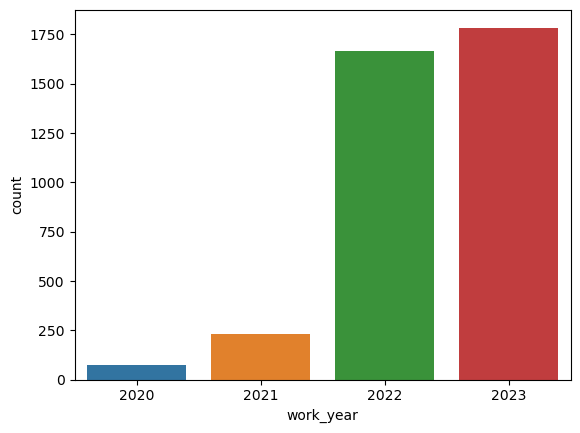

In [25]:
# Countplot
sns.countplot(x='work_year',data = inp0)
plt.show()

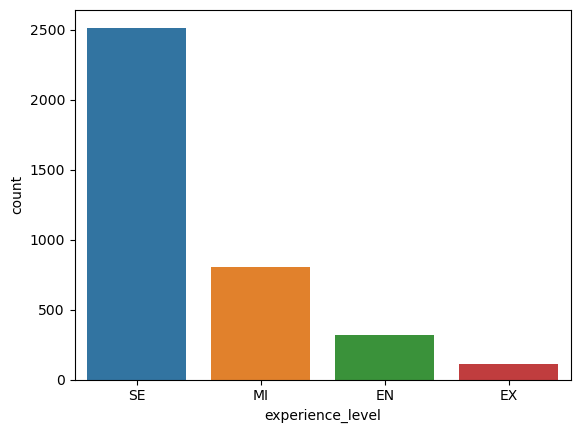

In [26]:
sns.countplot(x='experience_level',data = inp0)
plt.show()

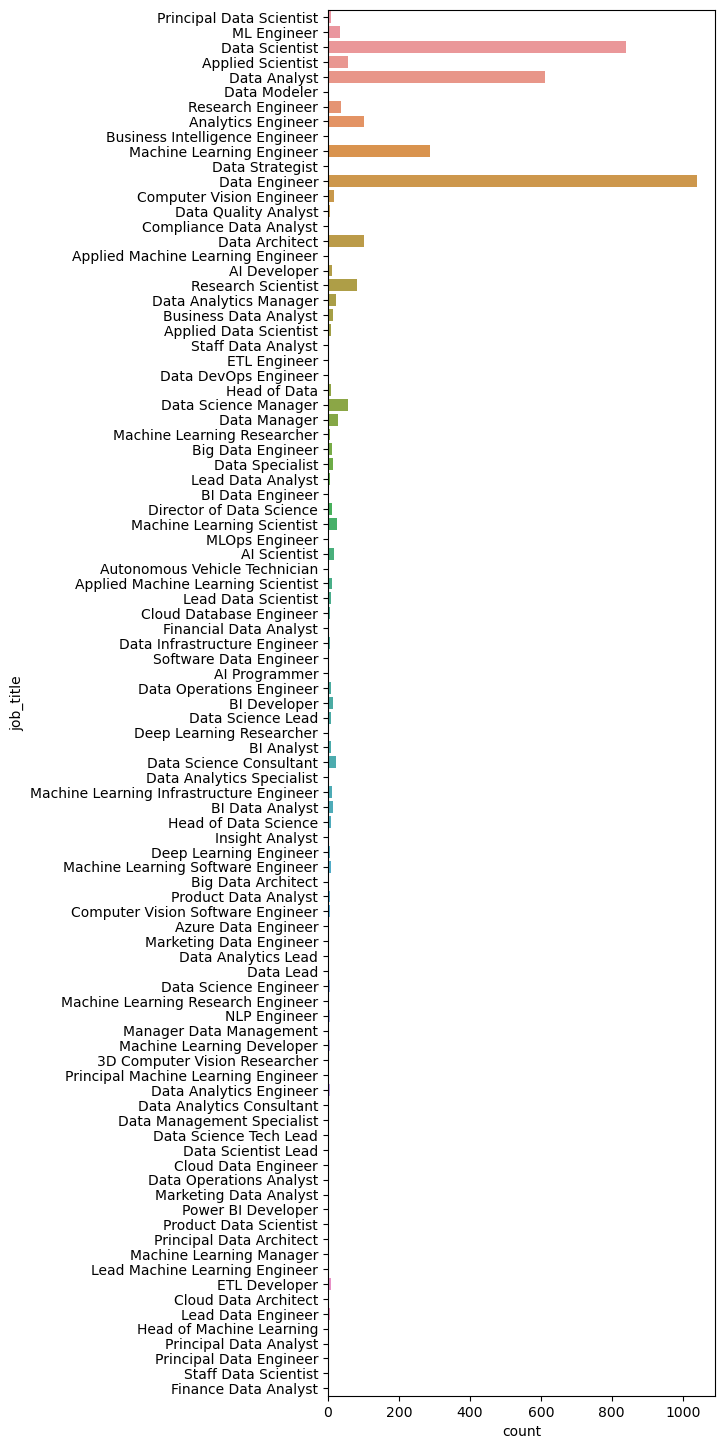

In [27]:
plt.figure(figsize=(5,18))
sns.countplot(y='job_title',data = inp0)
# plt.yticks(rotation=90)
plt.show()

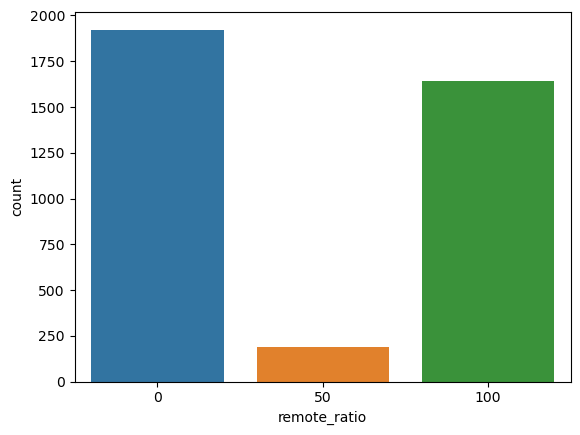

In [28]:
sns.countplot(x='remote_ratio',data = inp0)
plt.show()

# 2. BIVARIATE ANALYSIS 

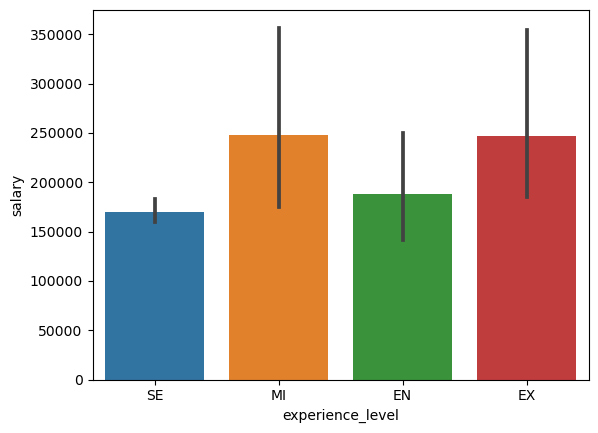

In [29]:
sns.barplot(x='experience_level',y='salary',data = inp0)
plt.show()

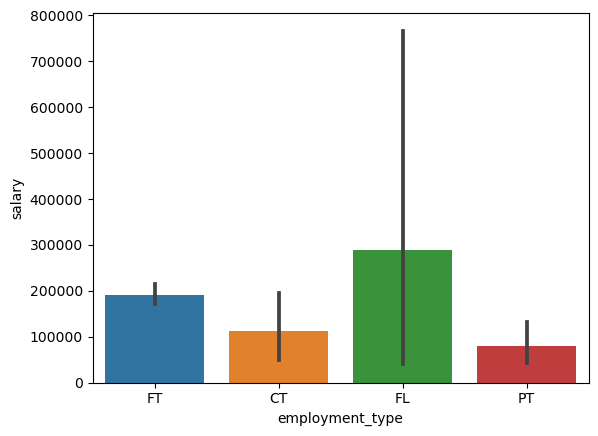

In [30]:
sns.barplot(x='employment_type',y='salary',data = inp0)
plt.show()

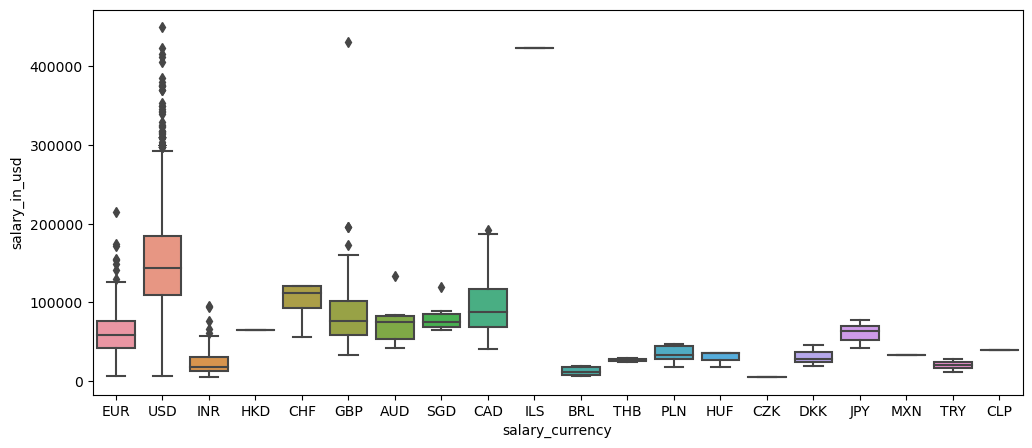

In [31]:
plt.figure(figsize=(12,5))
sns.boxplot(x='salary_currency',y='salary_in_usd',data = inp0)
# plt.xticks(rotation = 90)
plt.show()

# 3. MULTIVARIATE ANALYSIS

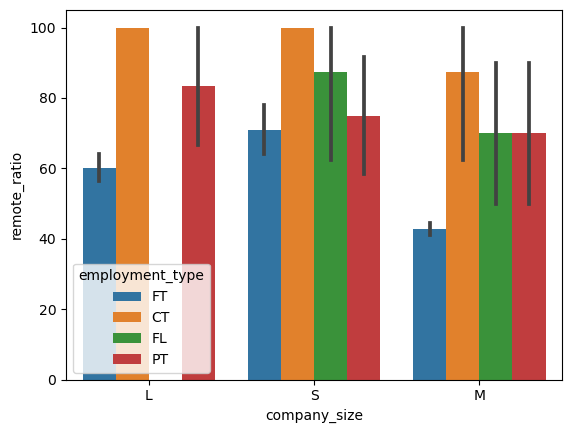

In [32]:
#boxplot
sns.barplot(x='company_size',y='remote_ratio',data=inp0,hue='employment_type')
plt.show()

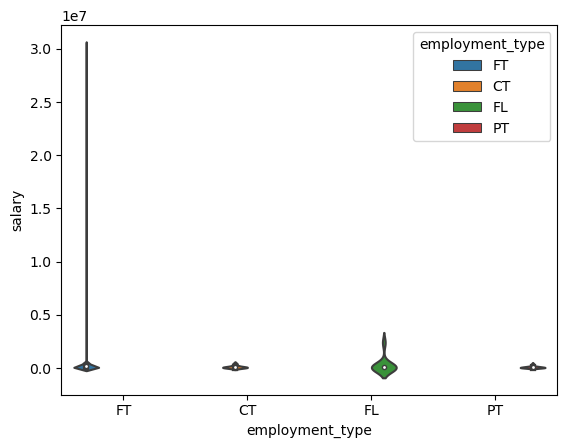

In [33]:
sns.violinplot(x='employment_type',y='salary',data=inp0,hue='employment_type')
plt.show()

In [34]:
inp0['salary_currency'].value_counts(normalize='True')

USD    0.858589
EUR    0.062850
GBP    0.042876
INR    0.015979
CAD    0.006658
AUD    0.002397
SGD    0.001598
BRL    0.001598
PLN    0.001332
CHF    0.001065
HUF    0.000799
DKK    0.000799
JPY    0.000799
TRY    0.000799
THB    0.000533
ILS    0.000266
HKD    0.000266
CZK    0.000266
MXN    0.000266
CLP    0.000266
Name: salary_currency, dtype: float64

# Heatmap


In [35]:
pivot_table1 = pd.pivot_table(data = inp0,values='salary',index =['experience_level','employment_type'],columns=['company_size'],aggfunc=np.min)

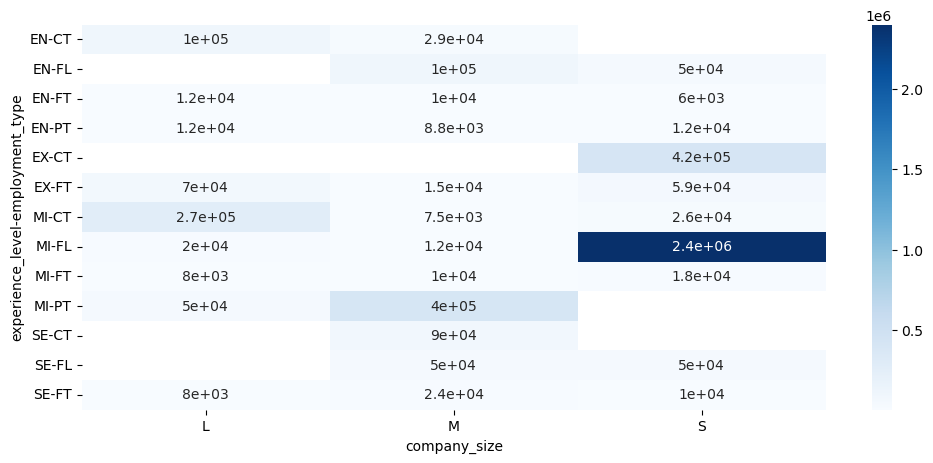

In [36]:
plt.figure(figsize=(12,5))
sns.heatmap(pivot_table1,cmap="Blues",annot=True)
plt.show()

In [37]:
pivot_table2 = pd.pivot_table(data = inp0,values='salary',index =['job_title'],columns=['employment_type','experience_level'],aggfunc=np.max)

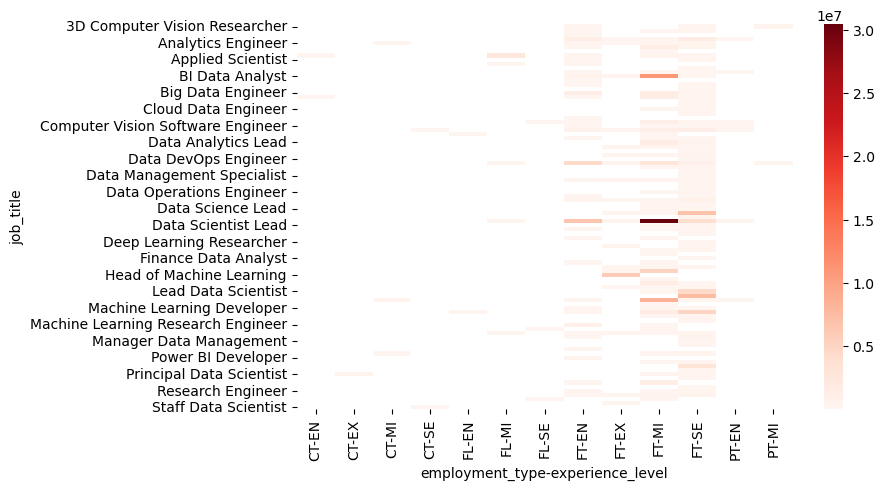

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table2,cmap ='Reds')
plt.show()

# INSIGHTS

# I. Univariate Analysis:

1.Clearly we can see in 2022,2023 many people were working in Data Science role approx [1750 as per our dataset].In 2020 very minimun atleast [100 as per our dataset]very working under Data Science Role.

2.People having experience as SE(Software Enginners) are more likely to get a job under Data Science.

3.In Data Science domain ,Pepole are more likely to get a job as Data Engineer,Data Analyst,Data Scientist ,Machine Learning Engineer Roles.

4.We can see people are more likely to work remotely. Hybrid model is very less in use or rather people likes working from in-office.

# II. Bivariate Analysis:

1.Experience required for both MI and EX are almost same.They both get the same salary around 250000 approx.

2.More people pefer to work under FL(FreeLancers) type employment and they get a decent salary of 300000. FT(Full Time) employee get a decent salary of 200000.Whereas CT(Contract Type) employees get around a salary of 150000 .Lastly PT(Part Type) employees get min salary of all 100000. From this we can say Comapny prefer Freelancers and Full Time employees than all.

3.People earrning more in USD currency. People also earring EUR,GBP,CAD currency as compared to others currencies.Whereas CZK,MXN,CLP curriencies are very least used currencies.

4.We can see Contract Employee works under any Large,Medium,Small Companies they always prefer to work remotely.In Large Comapnies Freelancers employees are not likely to be  considered.In small comapnies Freelancers are more likely to get job.

# III. Multivariate Analysis:

1. Data Scientist Lead who works as Full Time ,As Machine Learning Enginners  in Large size companies earn more than others.
 